# Importing, cleaning and exploring data

Data source: https://www.kaggle.com/competitions/cafa-5-protein-function-prediction/data
Evaluation metrics: https://www.kaggle.com/competitions/cafa-5-protein-function-prediction/overview/evaluation


First, run the following code in the conda environment to prevent exceeding the IOPub data rate for loading fasta files and then reopen the kernel:

jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e8

And make sure all packages are installed:
- pip install biopython
- pip install pandas
- pip install obonet


In [208]:
# load packages
from Bio import SeqIO
import pandas as pd
import obonet as obo
import matplotlib.pyplot as plt

# go-basic.obo
includes the ontology graph structure for each GO term.

This part of the training set contains data for Molecular Function (MF), Biological Process (BP) or Cellular Component (CC) subontologies of GO, which is what will be predicted for the test set. 

In [209]:
# import go-basic.obo
graph = obo.read_obo('cafa-5-protein-function-prediction/Train/go-basic.obo')

# Convert the graph to a DataFrame and reset the index
go = pd.DataFrame.from_dict(graph.nodes, orient='index').reset_index()
go = go.rename(columns={go.columns[0]: 'term'})

# Keep only important columns
go = go[['term', 'name', 'namespace']]
go.sample(10)

,term,name,namespace
6729,GO:0009954,proximal/distal pattern formation,biological_process
34899,GO:0120290,stalled replication fork localization to nucle...,biological_process
8685,GO:0016052,carbohydrate catabolic process,biological_process
31413,GO:0090482,vitamin transmembrane transporter activity,molecular_function
15248,GO:0034018,ascopyrone tautomerase activity,molecular_function
11541,GO:0021935,cerebellar granule cell precursor tangential m...,biological_process
16336,GO:0035197,siRNA binding,molecular_function
8765,GO:0016145,S-glycoside catabolic process,biological_process
31796,GO:0097158,pre-mRNA intronic pyrimidine-rich binding,molecular_function
36195,GO:1900340,negative regulation of methane biosynthetic pr...,biological_process


In [210]:
go.describe()

,term,name,namespace
count,43248,43248,43248
unique,43248,43248,3
top,GO:0000001,mitochondrion inheritance,biological_process
freq,1,1,27942


In [211]:
# check for missing data
print('go: \n', go.isna().sum())

go: 
 term         0
name         0
namespace    0
dtype: int64


In [212]:
# Check for duplicate names in the 'Name' column
duplicates_go = go['term'].duplicated()

if duplicates_go.any():
    print("There are entries with the same name.")
else:
    print("All names are unique.")

All names are unique.


In [213]:
duplicates_name = go['name'].duplicated()

if duplicates_name.any():
    print("There are entries with the same name.")
else:
    print("All names are unique.")

All names are unique.


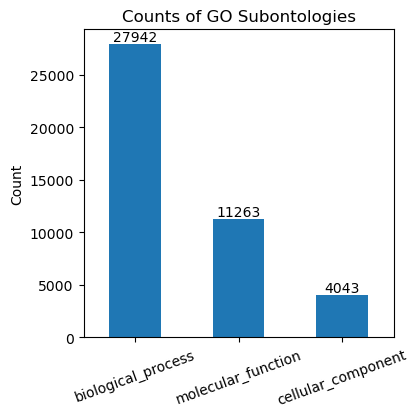

In [214]:
namespace_counts = go['namespace'].value_counts()
plt.figure(figsize=(4, 4))
namespace_counts.plot(kind='bar')
bar_plot = namespace_counts.plot(kind='bar')
plt.ylabel('Count')
plt.title('Counts of GO Subontologies')
plt.xticks(rotation = 20)
for index, value in enumerate(namespace_counts):
    bar_plot.text(index, value, str(value), ha='center', va='bottom')
plt.show()

# train_sequences.fasta
includes the amino acid sequences for proteins in training set.

In [215]:
# import train_sequences.fasta

fasta_train = 'cafa-5-protein-function-prediction/Train/train_sequences.fasta'

train_sequences = []

# Open the FASTA file and iterate over each record
for record in SeqIO.parse(fasta_train, "fasta"):
    # Retrieve the sequence ID and sequence
    seq_id = record.id
    sequence = str(record.seq)
    
    # Append the sequence ID and sequence as a tuple to the list
    train_sequences.append((seq_id, sequence))

# convert to dataframe
trainset = pd.DataFrame(train_sequences, columns=['EntryID', 'sequence'])
trainset.head()

,EntryID,sequence
0,P20536,MNSVTVSHAPYTITYHDDWEPVMSQLVEFYNEVASWLLRDETSPIP...
1,O73864,MTEYRNFLLLFITSLSVIYPCTGISWLGLTINGSSVGWNQTHHCKL...
2,O95231,MRLSSSPPRGPQQLSSFGSVDWLSQSSCSGPTHTPRPADFSLGSLP...
3,A0A0B4J1F4,MGGEAGADGPRGRVKSLGLVFEDESKGCYSSGETVAGHVLLEAAEP...
4,P54366,MVETNSPPAGYTLKRSPSDLGEQQQPPRQISRSPGNTAAYHLTTAM...


In [216]:
# check for missing data
print('trainset: \n', trainset.isna().sum())

trainset: 
 EntryID     0
sequence    0
dtype: int64


# train_taxonomy.tsv
includes the taxon ID for the proteins in training set.

In [217]:
# import train_taxonomy.tsv
train_taxon_ID = pd.read_csv("cafa-5-protein-function-prediction/Train/train_taxonomy.tsv", sep="\t")
train_taxon_ID.sample(5)

,EntryID,taxonomyID
122711,Q726E7,882
82974,A0A024RBQ3,9606
51943,Q386V1,185431
72440,P84826,8439
49798,C1BG59,8022


In [218]:
# check for missing data
print('train_taxon_ID: \n', train_taxon_ID.isna().sum())

train_taxon_ID: 
 EntryID       0
taxonomyID    0
dtype: int64


# train_terms.tsv
includes the training set of proteins and corresponding annotated GO terms.

In [219]:
# import train_terms.tsv
train_terms = pd.read_csv("cafa-5-protein-function-prediction/Train/train_terms.tsv", sep="\t")
train_terms.sample(5)

,EntryID,term,aspect
2878573,Q99220,GO:0019941,BPO
4642082,Q9VLS5,GO:0043231,CCO
3062931,Q9JI12,GO:0048880,BPO
4130643,Q15084,GO:0043230,CCO
1202861,P25962,GO:0097746,BPO


In [220]:
# Check for duplicate names in the 'Name' column
duplicates_EntryID = train_terms['EntryID'].duplicated()

if duplicates_EntryID.any():
    print("There are entries with the same name.")
else:
    print("All names are unique.")

There are entries with the same name.


In [221]:
# check for missing data
print('train_terms: \n', train_terms.isna().sum())

train_terms: 
 EntryID    0
term       0
aspect     0
dtype: int64


# IA.txt
includes the “Information Accretion” weights for each GO term.. These weights are used to compute weighted precision and recall, as described in the Evaluation section.

In [222]:
# import IA.txt
IA = pd.read_csv("cafa-5-protein-function-prediction/IA.txt", delimiter='\t', header=None)
IA = IA.rename(columns={IA.columns[0]: 'term', IA.columns[1]: 'ia_score'})
IA.head()

,term,ia_score
0,GO:0000001,0.000000
1,GO:0000002,3.103836
2,GO:0000003,3.439404
3,GO:0000011,0.056584
4,GO:0000012,6.400377


In [223]:
# check for missing data
print('IA: \n', IA.isna().sum())

IA: 
 term        0
ia_score    0
dtype: int64


# testsuperset.fasta
includes the amino acid sequences for proteins on which the predictions should be made.

In [224]:
# import testsuperset.fasta
fasta_test = 'cafa-5-protein-function-prediction/Test (Targets)/testsuperset.fasta'

testsuperset = []

# Open the FASTA file and iterate over each record
for record in SeqIO.parse(fasta_test, "fasta"):
    # Retrieve the sequence ID and sequence
    seq_id = record.id
    sequence = str(record.seq)
    
    # Append the sequence ID and sequence as a tuple to the list
    testsuperset.append((seq_id, sequence))

# convert to dataframe
testset = pd.DataFrame(testsuperset, columns=['seq_id', 'sequence'])
testset.head()

,seq_id,sequence
0,Q9CQV8,MTMDKSELVQKAKLAEQAERYDDMAAAMKAVTEQGHELSNEERNLL...
1,P62259,MDDREDLVYQAKLAEQAERYDEMVESMKKVAGMDVELTVEERNLLS...
2,P68510,MGDREQLLQRARLAEQAERYDDMASAMKAVTELNEPLSNEDRNLLS...
3,P61982,MVDREQLVQKARLAEQAERYDDMAAAMKNVTELNEPLSNEERNLLS...
4,O70456,MERASLIQKAKLAEQAERYEDMAAFMKSAVEKGEELSCEERNLLSV...


In [225]:
# check for missing data
print('testset: \n', testset.isna().sum())

testset: 
 seq_id      0
sequence    0
dtype: int64


# testsuperset-taxon-list.tsv
inclues the taxon ID for proteins in test superset.

In [226]:
# import testsuperset-taxon-list.tsv
test_taxon = pd.read_csv("cafa-5-protein-function-prediction/Test (Targets)/testsuperset-taxon-list.tsv", sep="\t", encoding="ISO-8859-1")
test_taxon.sample(5)

,ID,Species
85,8671,Pseudechis porphyriacus (snakes)
47,7159,Aedes aegypti
49,7962,Cyprinus carpio [common carp)
70,284811,Eremothecium gossypii ATCC 10895 (budding yeast)
65,196418,Hoplocephalus stephensii (snakes)


In [227]:
# check for missing data
print('test_taxon: \n', test_taxon.isna().sum())

test_taxon: 
 ID         0
Species    0
dtype: int64


# sample_submission.tsv
is an example of a submission file in the correct format.

In [228]:
# sample_submission.tsv
sample_submission = pd.read_csv("cafa-5-protein-function-prediction/sample_submission.tsv", sep="\t", header=None)
sample_submission = sample_submission.rename(columns={sample_submission.columns[0]: 'protein_targets', sample_submission.columns[1]: 'term', sample_submission.columns[2]: 'prob_estimate'})
sample_submission.sample(4)

,protein_targets,term,prob_estimate
52842,P01796,GO:0000001,0.123
18827,J9VQZ4,GO:0000002,0.123
236725,Q69D47,GO:0000002,0.123
18955,L0T911,GO:0000002,0.123


# Merging the training data

In [229]:
# merge dataframes by go terms

go_merge = pd.merge(go, train_terms, on='term')
go_merge.head()

,term,name,namespace,EntryID,aspect
0,GO:0000001,mitochondrion inheritance,biological_process,P21147,BPO
1,GO:0000001,mitochondrion inheritance,biological_process,P32266,BPO
2,GO:0000001,mitochondrion inheritance,biological_process,P32381,BPO
3,GO:0000001,mitochondrion inheritance,biological_process,P35182,BPO
4,GO:0000001,mitochondrion inheritance,biological_process,P38880,BPO


In [230]:
go_merge.shape[0]

5363863

In [231]:
# merge dataframes by entryID

entryID_merge = pd.merge(trainset, train_taxon_ID, on='EntryID')
protein_train = pd.merge(go_merge, entryID_merge, on='EntryID')
protein_train.head()

,term,name,namespace,EntryID,aspect,sequence,taxonomyID
0,GO:0000001,mitochondrion inheritance,biological_process,P21147,BPO,MPTSGTTIELIDDQFPKDDSASSGIVDEVDLTEANILATGLNKKAP...,559292
1,GO:0003674,molecular_function,molecular_function,P21147,MFO,MPTSGTTIELIDDQFPKDDSASSGIVDEVDLTEANILATGLNKKAP...,559292
2,GO:0003824,catalytic activity,molecular_function,P21147,MFO,MPTSGTTIELIDDQFPKDDSASSGIVDEVDLTEANILATGLNKKAP...,559292
3,GO:0004768,stearoyl-CoA 9-desaturase activity,molecular_function,P21147,MFO,MPTSGTTIELIDDQFPKDDSASSGIVDEVDLTEANILATGLNKKAP...,559292
4,GO:0005575,cellular_component,cellular_component,P21147,CCO,MPTSGTTIELIDDQFPKDDSASSGIVDEVDLTEANILATGLNKKAP...,559292


In [232]:
protein_train.shape[0]

5363863

# keras neural network (with subset) 
This code will require more memory than available in a standard PC, even with subsampling
subset_size = 10000 and batch_size=32 --> 23 days per epoch

In [233]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

In [234]:
# subset the data (when on my PC)
# minimize the time it takes to assign numbers to amino acid characters
# and prevent memory issues with padding sequences
subset_size = 2000
random_indices = np.random.choice(protein_train.index, size=subset_size, replace=False)
X_train_subset = protein_train.loc[random_indices, 'sequence']
y_train_subset = protein_train.loc[random_indices, 'term']

In [235]:
# label encoding to transform the target variable from categorical to numeric data
label_encoder = LabelEncoder()
y_train_subset = label_encoder.fit_transform(y_train_subset)

In [236]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train_subset, y_train_subset, test_size=0.2, random_state=420)

In [237]:
# assigns numbers to each amino acid character
char_to_int = {'A': 0, 'R': 1, 'N': 2, 'D': 3, 'C': 4, 'Q': 5, 'E': 6, 'G': 7, 'H': 8, 'I': 9, 'L': 10, 'K': 11, 'M': 12, 'F': 13, 'P': 14, 'S': 15, 'T': 16, 'W': 17, 'Y': 18, 'V': 19}
num_classes = len(label_encoder.classes_)

# assigns a default value for characters not in the dictionary
default_value = 20  
def convert_char_to_int(char):
    return char_to_int.get(char, default_value)

# convert the sequences into numeric representation
X_train_encoded = [[convert_char_to_int(char) for char in seq] for seq in X_train]
X_train_encoded = np.array(X_train_encoded)

X_test_encoded = [[convert_char_to_int(char) for char in seq] for seq in X_test]
X_test_encoded = np.array(X_test_encoded)

#can ignore 'Warning: Creating an ndarray from ragged nested sequences' about X_train_encoded and X_test encoded being different lengths, because it will resolve when sequences are padded

C:\Users\ljbri\AppData\Local\Temp\ipykernel_16932\3759723670.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_encoded = np.array(X_train_encoded)
C:\Users\ljbri\AppData\Local\Temp\ipykernel_16932\3759723670.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_encoded = np.array(X_test_encoded)


In [238]:
# pad sequences to have the same length using zeros
max_sequence_length = max(len(seq) for seq in X_train_subset)
X_train_padded = np.zeros((X_train_encoded.shape[0], max_sequence_length), dtype=np.int32)
for i, seq in enumerate(X_train_encoded):
    X_train_padded[i, :len(seq)] = seq

[[12  1 15 ...  0  0  0]
 [12  0 19 ...  0  0  0]
 [12  0 10 ...  0  0  0]
 ...
 [12  6  2 ...  0  0  0]
 [12 18  1 ...  0  0  0]
 [12  8 14 ...  0  0  0]]


In [240]:
# create the model
model1 = models.Sequential()
model1.add(Embedding(input_dim=len(char_to_int), output_dim=64, input_length=max_sequence_length)) #convert amino acid sequences into dense vectors (captures sequential relationships between characters)
model1.add(LSTM(units=128)) #recurrent neural network  processes embedded sequences and extracts relevant features/patterns
model1.add(Dense(units=num_classes, activation='softmax'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 18141, 64)         1280      
                                                                 
 lstm_3 (LSTM)               (None, 128)               98816     
                                                                 
 dense_2 (Dense)             (None, 981)               126549    
                                                                 
Total params: 226,645
Trainable params: 226,645
Non-trainable params: 0
_________________________________________________________________


In [241]:
# compile the model
model1.compile(loss='sparse_categorical_crossentropy', #common when more than two categories
               optimizer='adam', #efficient and effective for deep learning tasks
               metrics=['accuracy']) #represents % of correctly predicted samples; common for classification


In [242]:
# train the model for 1 epochs to start
model1.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=1, batch_size=4)

 10/400 [..............................] - ETA: 6:38:42 - loss: 6.8866 - accuracy: 0.0000e+00

InvalidArgumentError: Graph execution error:

Detected at node 'sequential_4/embedding_3/embedding_lookup' defined at (most recent call last):
    File "C:\Users\ljbri\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\ljbri\anaconda3\lib\runpy.py", line 86, in _run_code
      exec(code, run_globals)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\ljbri\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\ljbri\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 711, in start
      self.io_loop.start()
    File "C:\Users\ljbri\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ljbri\anaconda3\lib\asyncio\base_events.py", line 603, in run_forever
      self._run_once()
    File "C:\Users\ljbri\anaconda3\lib\asyncio\base_events.py", line 1906, in _run_once
      handle._run()
    File "C:\Users\ljbri\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Users\ljbri\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Users\ljbri\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "C:\Users\ljbri\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "C:\Users\ljbri\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2961, in run_cell
      result = self._run_cell(
    File "C:\Users\ljbri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3016, in _run_cell
      result = runner(coro)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3221, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ljbri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3400, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\ljbri\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ljbri\AppData\Local\Temp\ipykernel_16932\401573862.py", line 2, in <module>
      model1.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=1, batch_size=4)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\engine\training.py", line 1685, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\engine\training.py", line 1284, in train_function
      return step_function(self, iterator)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\engine\training.py", line 1268, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\engine\training.py", line 1050, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\engine\training.py", line 558, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\engine\sequential.py", line 412, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\engine\functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\engine\functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1145, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ljbri\anaconda3\lib\site-packages\keras\layers\core\embedding.py", line 272, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'sequential_4/embedding_3/embedding_lookup'
indices[2,0] = 20 is not in [0, 20)
	 [[{{node sequential_4/embedding_3/embedding_lookup}}]] [Op:__inference_train_function_10829]

In [ ]:
# evaluate the model on the testing data
loss, accuracy = model1.evaluate(X_test_padded, y_test)
 
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# keras neural network
This code on the full dataset will require more memory than available in a standard PC

In [122]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM

In [163]:
# extract features with 'term' as the target variable aka what's being predicted based on the input variable 'sequence' aka what's training the model
X = protein_train['sequence']
y = protein_train['term']

print(type(X))
print(type(y))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [149]:
# label encoding to transform the target variable from categorical to numeric data
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [161]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

In [151]:
# define  max sequence length so we can pad all sequences to have the same length (recommended for neural networks that process inputs in fixed-size batches)
max_sequence_length = max(X_train.str.len())

In [153]:
# assigns numbers to each amino acid character
#takes ~40 min
char_to_int = {'A': 0, 'R': 1, 'N': 2, 'D': 3, 'C': 4, 'Q': 5, 'E': 6, 'G': 7, 'H': 8, 'I': 9, 'L': 10, 'K': 11, 'M': 12, 'F': 13, 'P': 14, 'S': 15, 'T': 16, 'W': 17, 'Y': 18, 'V': 19}
num_classes = len(label_encoder.classes_)

# assigns a default value for characters not in the dictionary
default_value = 20  
def convert_char_to_int(char):
    return char_to_int.get(char, default_value)

# convert the sequences into numeric representation
X_train_encoded = [[convert_char_to_int(char) for char in seq] for seq in X_train]
X_train_encoded = np.array(X_train_encoded)

X_test_encoded = [[convert_char_to_int(char) for char in seq] for seq in X_test]
X_test_encoded = np.array(X_test_encoded)

#can ignore 'Warning: Creating an ndarray from ragged nested sequences' about X_train_encoded and X_test encoded being different lengths, because it will resolve when sequences are padded

C:\Users\ljbri\AppData\Local\Temp\ipykernel_16932\1473907176.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_encoded = np.array(X_train_encoded)
C:\Users\ljbri\AppData\Local\Temp\ipykernel_16932\1473907176.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_encoded = np.array(X_test_encoded)


In [158]:
# pad sequences to have the same length using zeros
X_train_padded = np.zeros((X_train_encoded.shape[0], max_sequence_length), dtype=np.int32)
for i, seq in enumerate(X_train_encoded):
    X_train_padded[i, :len(seq)] = seq

type(X_train_padded)
print(X_train_padded)
np.save('X_train_padded', X_train_padded)

MemoryError: Unable to allocate 283. GiB for an array with shape (4291090, 35375) and data type int16

In [ ]:
# create the model
model1 = models.Sequential()
model1.add(Embedding(input_dim=num_classes, output_dim=64, input_length=max_sequence_length)) #convert amino acid sequences into dense vectors (captures sequential relationships between characters)
model1.add(LSTM(units=128)) #recurrent neural netowrk  processes embedded sequences and extracts relevant features/patterns
model1.add(Dense(units=num_classes, activation='softmax')) #fully connected final layer

model1.summary()

In [ ]:
# compile the model
model1.compile(loss='sparse_categorical_crossentropy', #common when more than two categories
               optimizer='adam', #efficient and effective for deep learning tasks
               metrics=['accuracy']) #represents % of correctly predicted samples; common for classification


In [ ]:
# train the model for 10 epochs
model1.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=10, batch_size=32)

In [ ]:
# evaluate the model on the testing data
loss, accuracy = model1.evaluate(X_test_padded, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

In [ ]:
# train the model for 100 epochs
n_epochs = 100

history1 = model1.fit(X_train_padded,
                       y_train,
                       epochs = n_epochs,
                       batch_size = 25,
                       validation_data = (X_test_padded, 
                                          y_test))

history1.history()

In [ ]:
#plot training accuracy and validation accuracy against the epoch 

sns.set_style("whitegrid")

plt.figure(figsize=(10,5))

plt.scatter(range(1,n_epochs+1), 
            history1.history['accuracy'], 
            label="Training Data")
plt.scatter(range(1,n_epochs+1), 
            history1.history['val_accuracy'], 
            marker='v',
            label="Validation Data")

plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)


plt.legend(fontsize=12)


plt.show()